In [1]:
    import networkx as nx
    import numpy as np
    import EoN
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import cm
    from Functions import *


In [2]:
    net,number_of_nodes = Net_generation("network_rocha-etal.csv")



In [3]:
    # Simulation
    want_simulation=False
    if want_simulation:
        # Defining parameter of the epidemic
        franction_of_initial_infected=0.005
        Sim_data=[]
        #start grid search
        for gamma in np.arange(0.001,0.01,0.001):
            for tau in np.arange(0.001,0.01,0.001):
                t, S,I,R = EoN.fast_SIR(net, tau, gamma, rho=franction_of_initial_infected,return_full_data=False)
                Sim_data.append([gamma,tau,t,S,I,R])



        # preparing data for exporting
        mu =np.array([row[0] for row in Sim_data]) #gamma
        beta = np.array([row[1] for row in Sim_data]) #tau
        time=[row[2] for row in Sim_data]
        S=[row[3] for row in Sim_data]
        I=[row[4] for row in Sim_data]
        R=[row[5] for row in Sim_data]

        # save offline
        np.save("simulazione",[mu,beta,time,S,I,R])


In [4]:
    # load simulation file
    Sim=np.load("simulazione.npy",allow_pickle=True)
    mu =Sim[0]
    beta = Sim[1]
    Y=mu.ravel()
    X=beta.ravel()
    time=Sim[2]
    S=Sim[3]
    I=Sim[4]
    R=Sim[5]

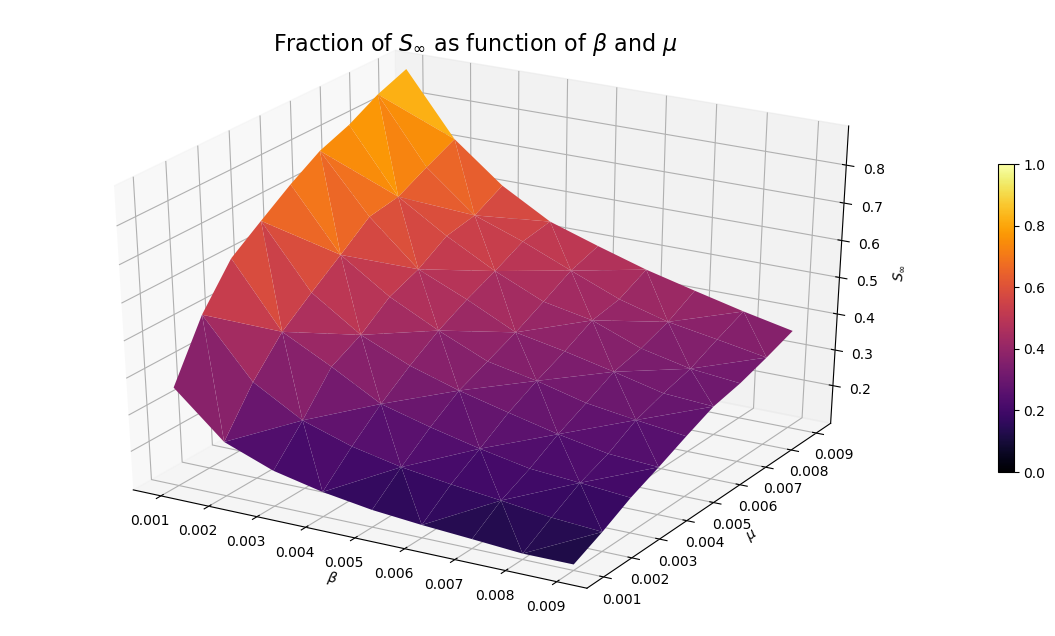

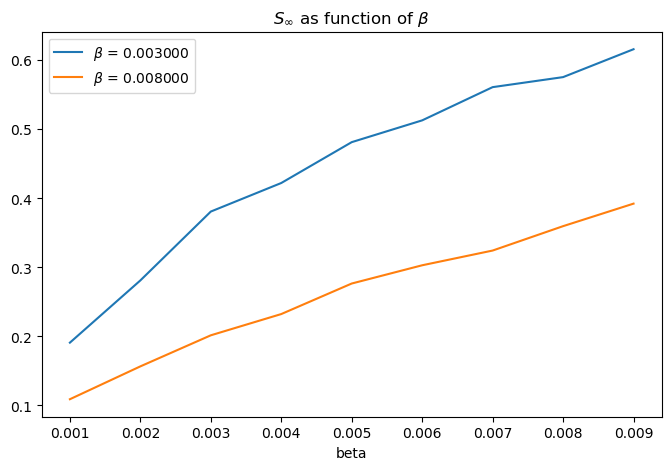

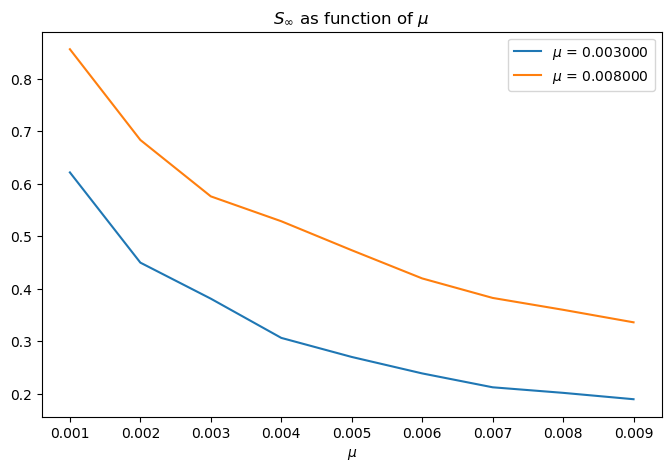

In [5]:
    #%% Plot of S_inf and R_inf and some cut
    S_inf, R_inf = S_R_inf_surfaces(mu,beta,time,S,I,R,number_of_nodes)

    S_inf_mu, S_inf_beta =tagli(mu,beta,S_inf,number_of_nodes,[0.003,0.008],"$S_\\infty$","$S_\\infty$")

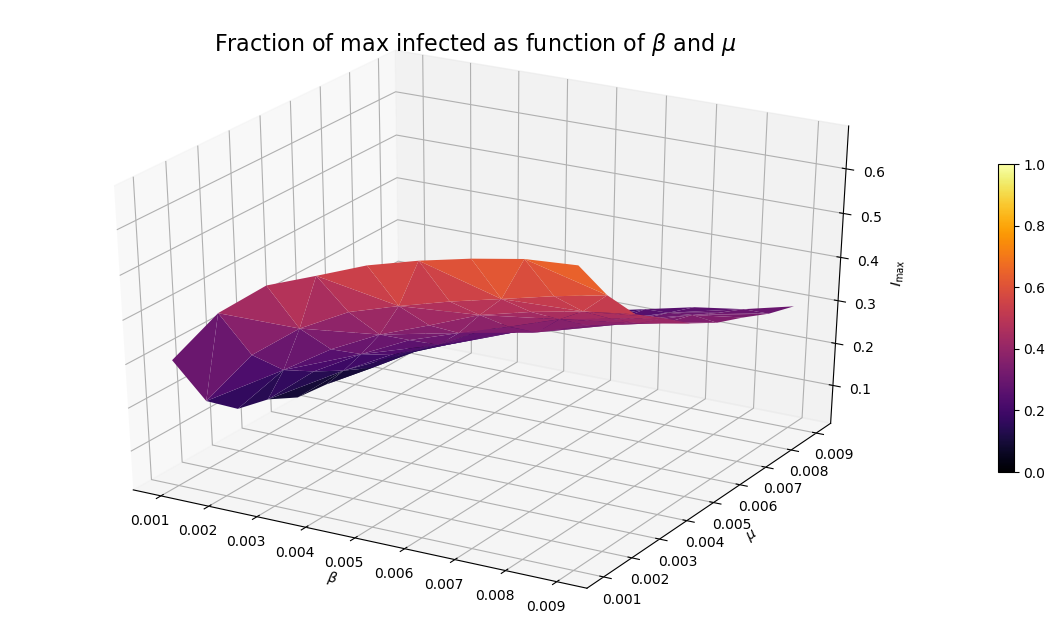

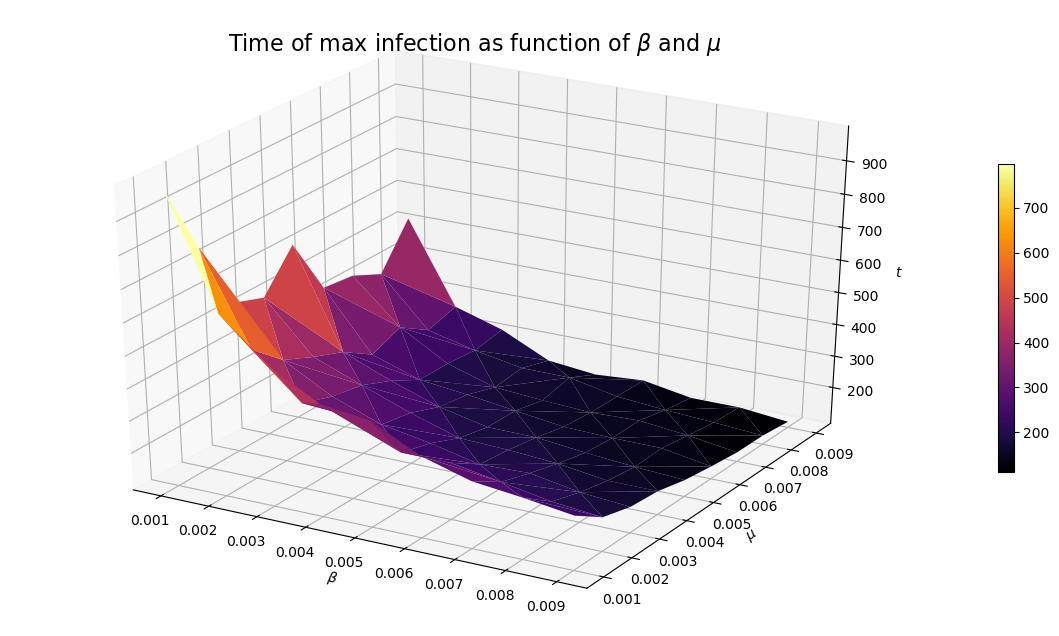

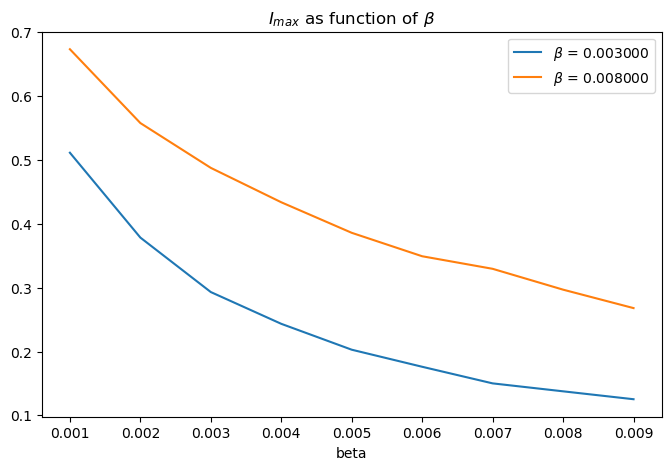

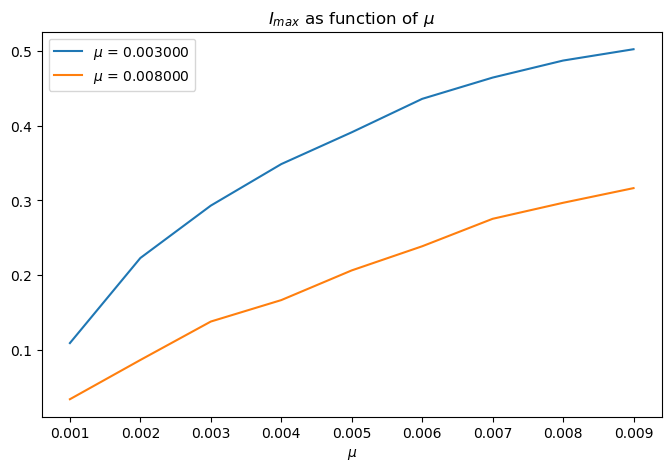

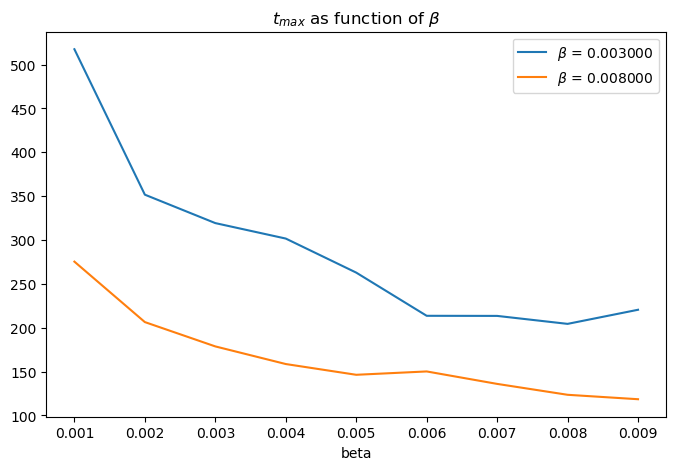

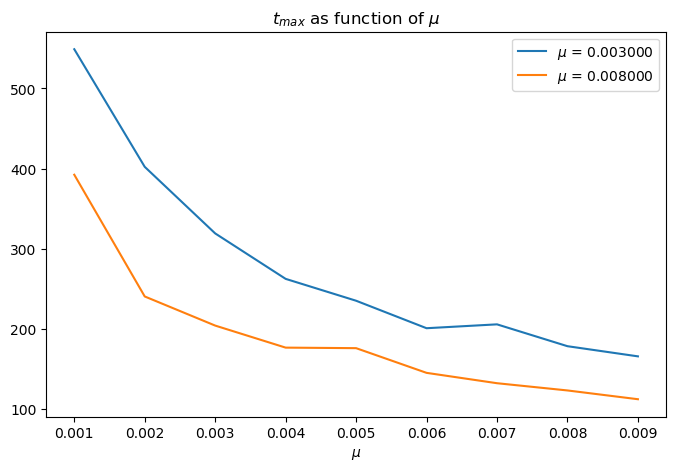

In [6]:
    #%% Plot of I_max and time(I_max) and some cut
    I_max,time_max = I_max_surfaces(mu,beta,time,S,I,R,number_of_nodes)

    Grafico_funzione_di_mu_I,Grafico_funzione_di_beta_I=tagli(mu,beta,I_max,number_of_nodes,[0.003,0.008],"$I_{max}$","$I_{max}$")

    Grafico_funzione_di_mu_t,Grafico_funzione_di_beta_t=tagli(mu,beta,time_max,1,[0.003,0.008],"$t_{max}$","$t_{max}$")




## Segregation

In [7]:
    #%% creation of the Net without nodes with greatest degree
    a=[]
    b=[]

    female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
    dim = max(female.max(), male.max())+1
    adj = np.zeros((dim,dim))
    for i,j in zip(female,male):
        adj[i,j] = 1
        adj[j,i] = 1
    net_target = nx.from_numpy_array(adj)

    id_female = np.unique(female)
    id_male   = np.unique(male)
    a_, deg = zip(*list(net_target.degree()))


In [8]:
    #%%simulation
    Sim_data=[]
    want_simulation=False
    if want_simulation:
        for i in (10,100,200):
            net_target_copy = net_target.copy()
            remove = [node for node,degree in dict(net_target.degree()).items() if degree >= i]
            net_target_copy.remove_nodes_from(remove)

            #SIMULATION
            # Defining parameter of the epidemic
            franction_of_initial_infected=0.005
            for gamma in np.arange(0.001,0.01,0.001):
                for tau in np.arange(0.001,0.01,0.001):
                    t,S,I,R = EoN.fast_SIR(net_target_copy, tau, gamma,rho=franction_of_initial_infected,return_full_data=False)
                    Sim_data.append([i,gamma,tau,t,S,I,R])
                    print(i,gamma)

        #%% preparing data for exporting
            last_deg_kept= np.array([row[0] for row in Sim_data])
            mu =np.array([row[1] for row in Sim_data]) #gamma
            beta = np.array([row[2] for row in Sim_data]) #tau
            time=[row[3] for row in Sim_data]
            S=[row[4] for row in Sim_data]
            I=[row[5] for row in Sim_data]
            R=[row[6] for row in Sim_data]

        # save offline
        np.save("simulazione_target",[last_deg_kept,mu,beta,time,S,I,R])

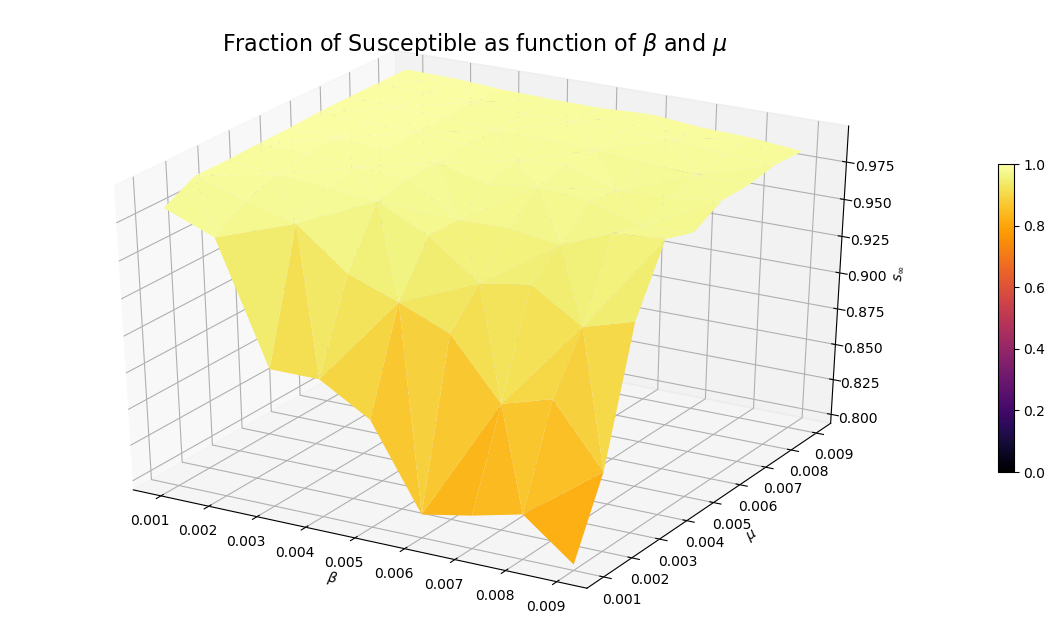

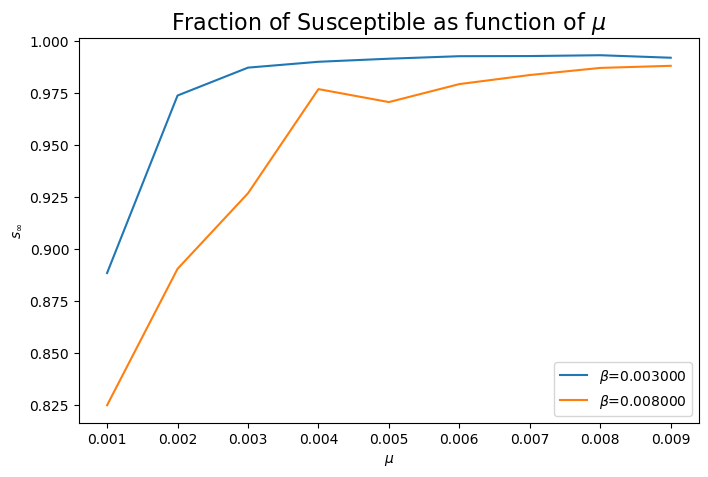

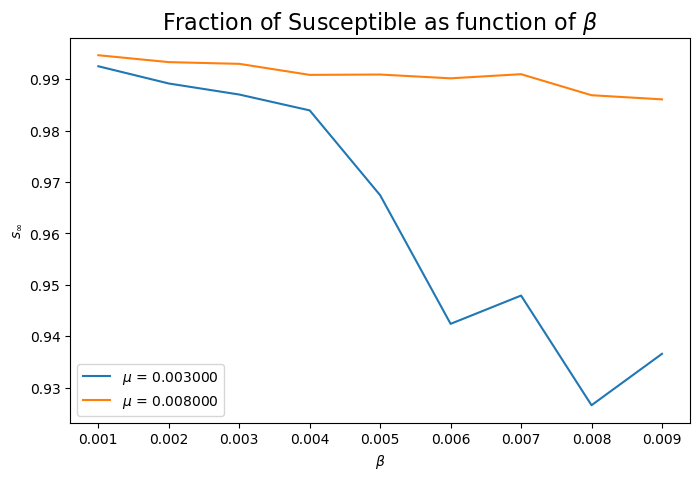

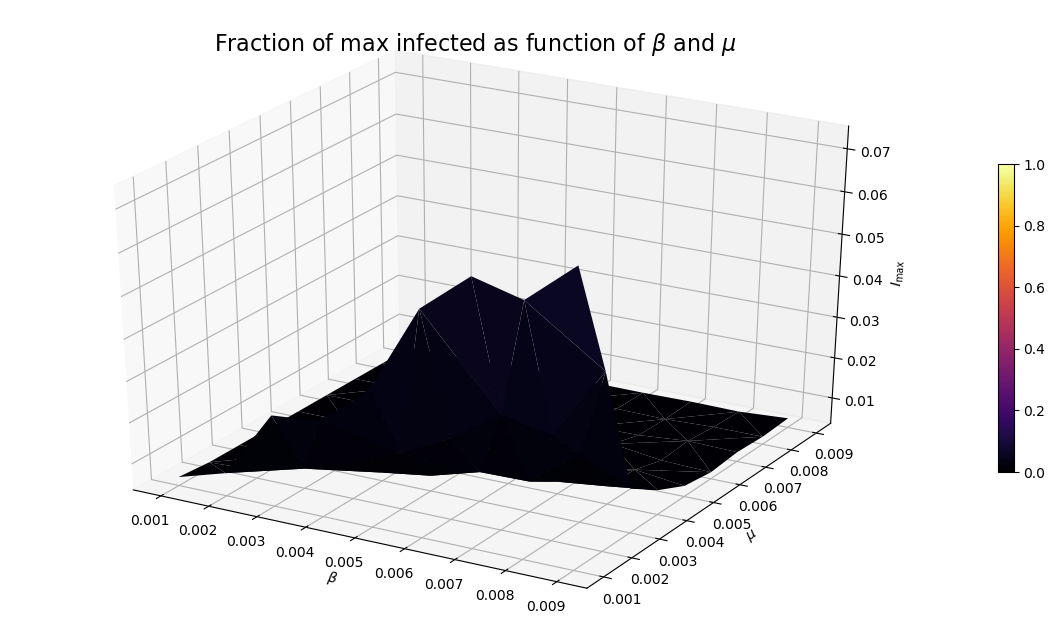

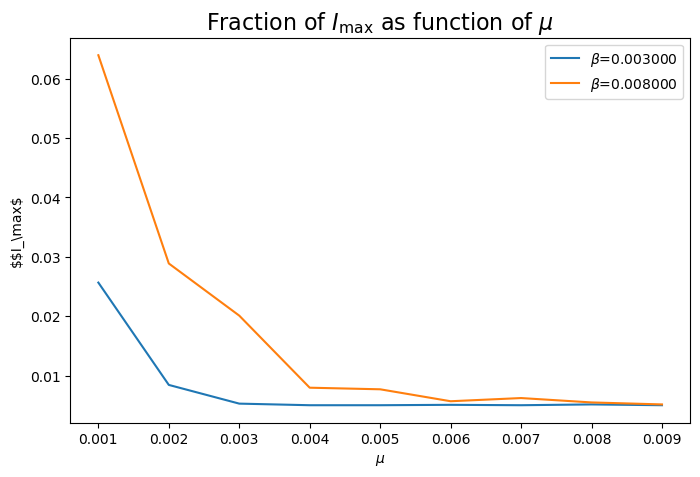

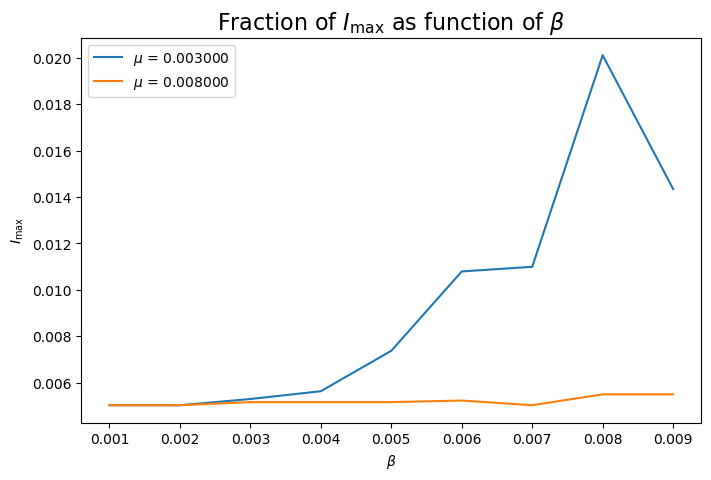

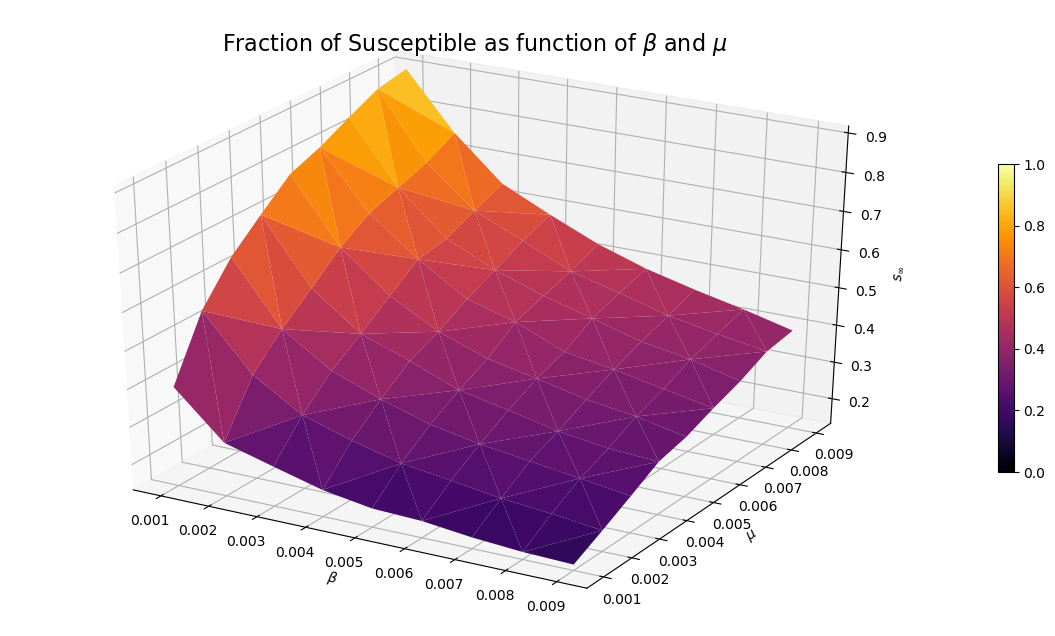

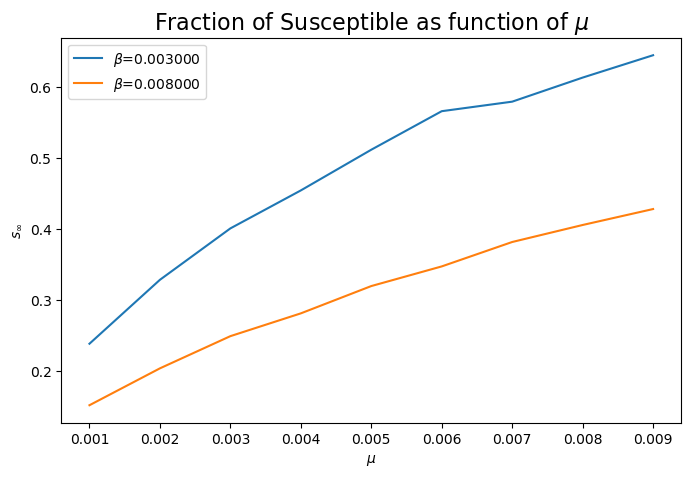

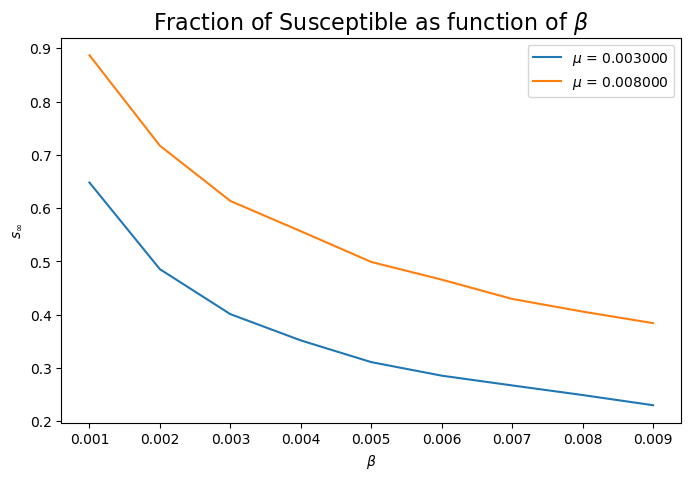

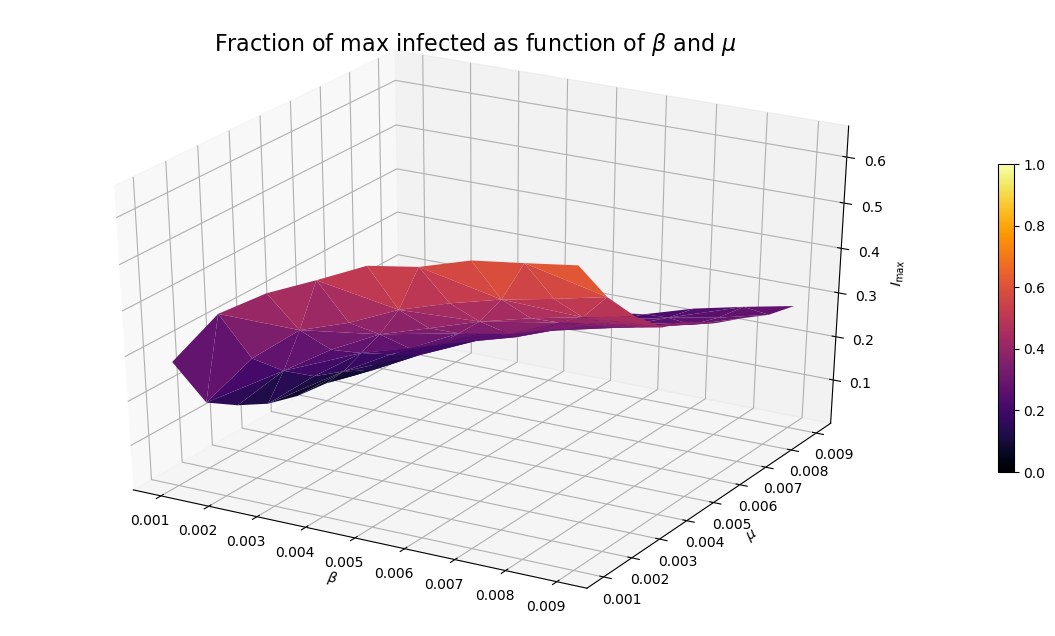

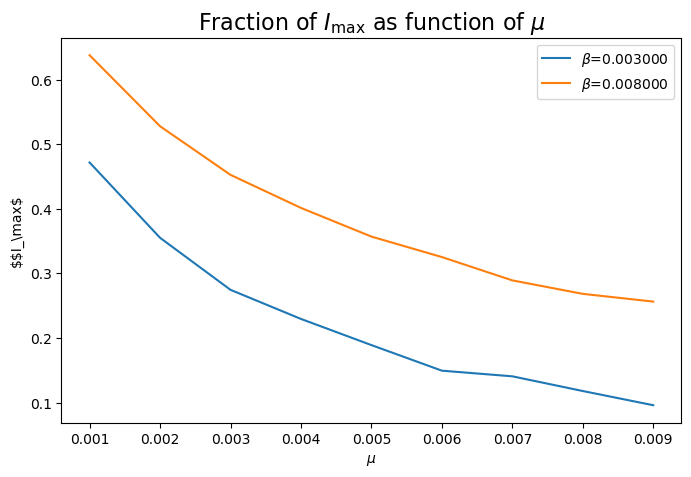

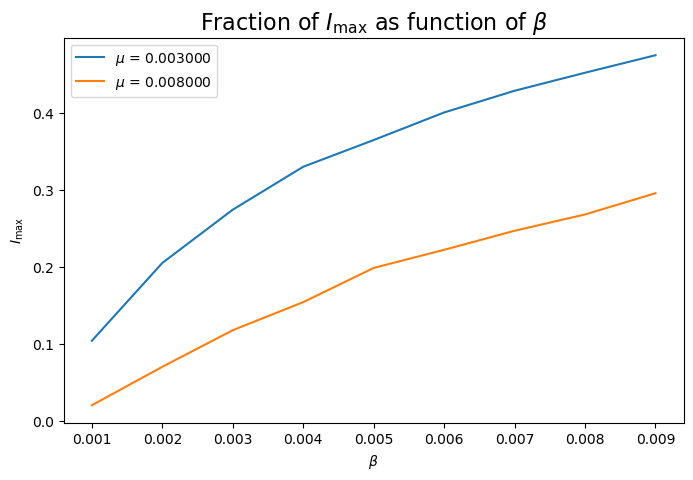

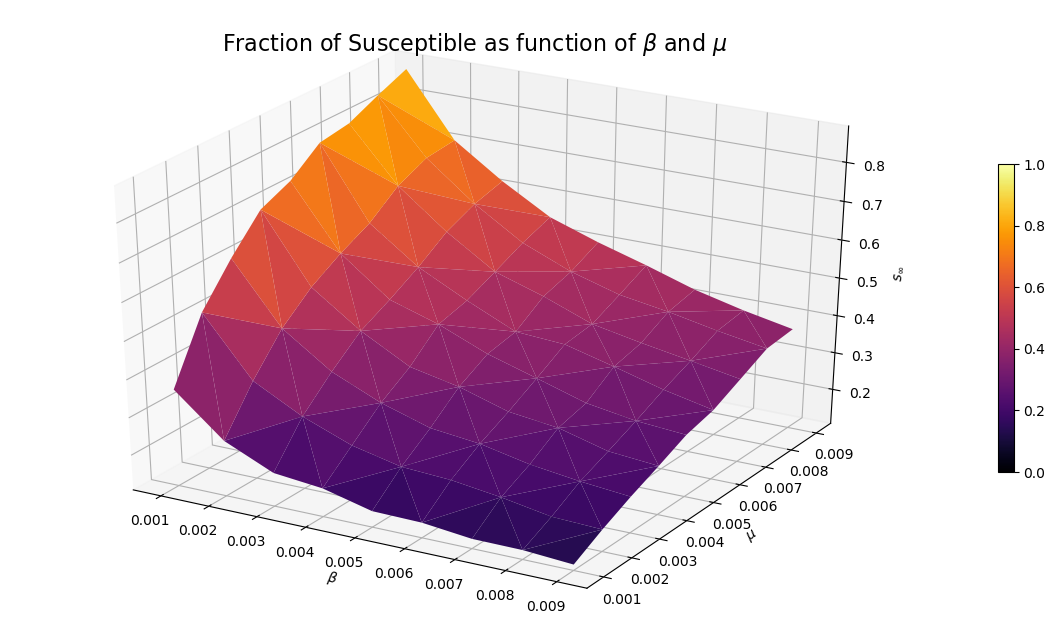

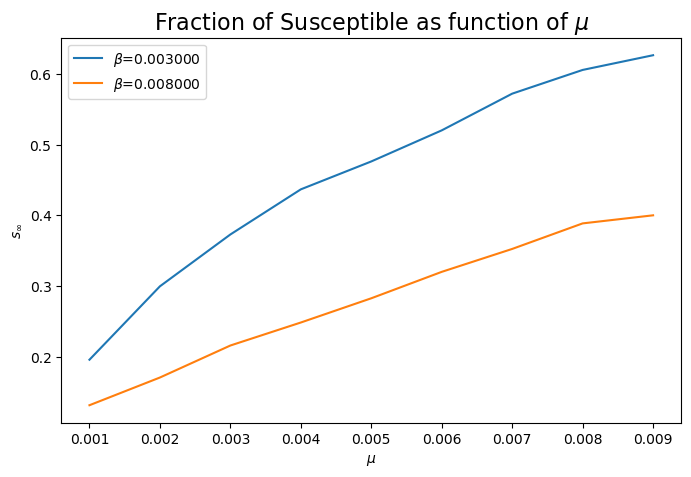

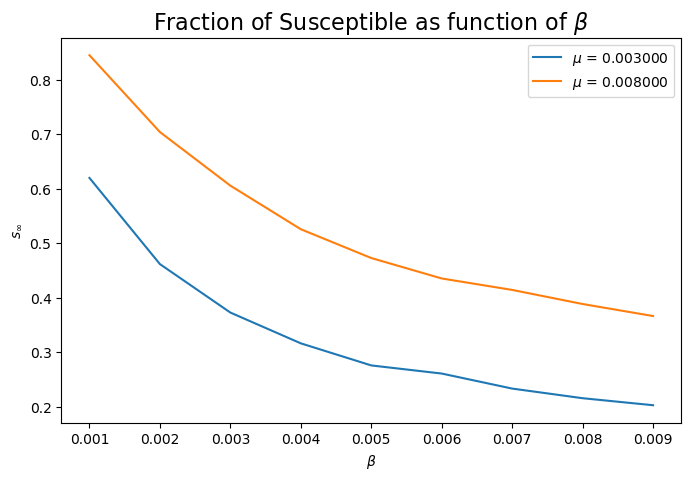

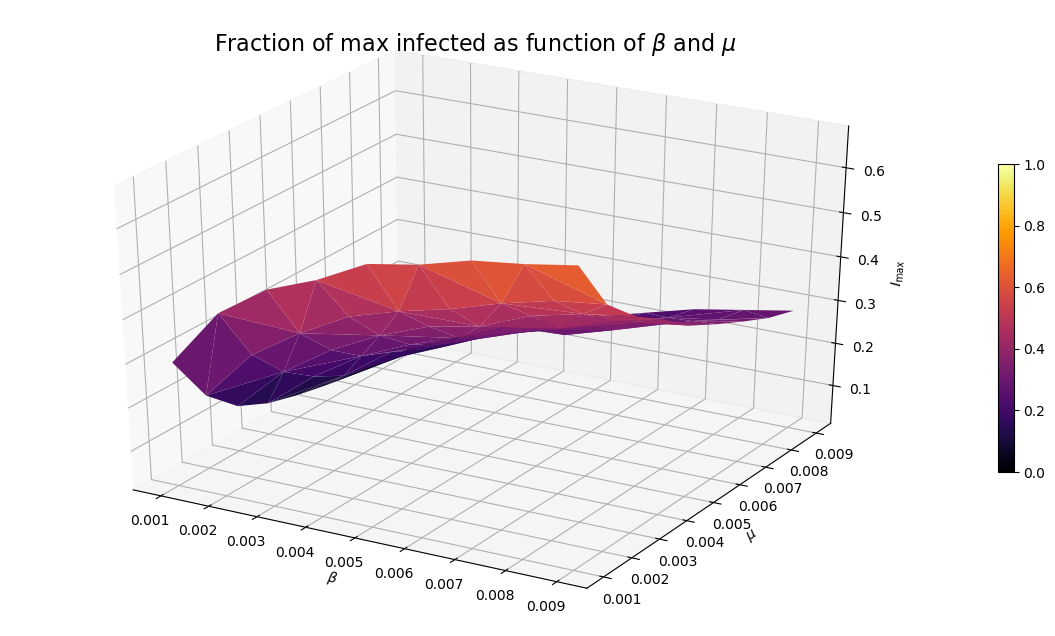

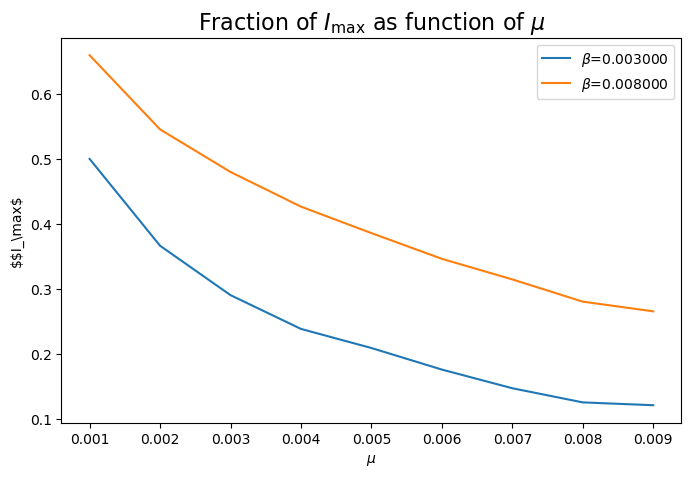

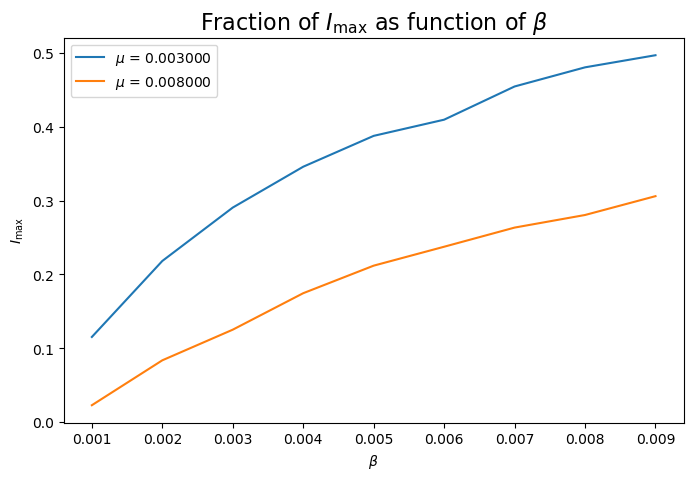

In [10]:
    #%%plot

    Sim_t=np.load("simulazione_target.npy",allow_pickle=True)
    last_deg_kept= np.array(Sim_t[0])
    mu_t =np.array(Sim_t[1])
    beta_t = np.array(Sim_t[2])
    time_t=np.array(Sim_t[3])
    S_t=np.array(Sim_t[4])
    I_t=np.array(Sim_t[5])
    R_t=np.array(Sim_t[6])
    Y_target_seg_S_inf_m = []
    X_target_seg_S_inf_m = []
    Y_target_seg_S_inf_b = []
    X_target_seg_S_inf_b = []
    for deg in np.unique(last_deg_kept):
        mu_t_deg=mu_t[last_deg_kept==deg]
        beta_t_deg=beta_t[last_deg_kept==deg]
        time_t_deg=time_t[last_deg_kept==deg]
        S_t_deg=S_t[last_deg_kept==deg]
        I_t_deg=I_t[last_deg_kept==deg]
        R_t_deg=R_t[last_deg_kept==deg]

        #%% plot of surface for S_inf e i max
        S_inf=[]
        R_inf=[]
        number_of_nodes=[]
        for i in range(len(S_t_deg)):
            S_inf += [S_t_deg[i][-1]]
            R_inf += [R_t_deg[i][-1]]
            number_of_nodes.append(S_t_deg[i][-1]+R_t_deg[i][-1])
        number_of_nodes=number_of_nodes[1]


        S_inf=np.array(S_inf)
        R_inf=np.array(R_inf)
        fig = plt.figure(figsize=(15,8))
        ax = fig.gca(projection='3d')
        Y=mu_t_deg.ravel()
        X=beta_t_deg.ravel()
        plot = ax.plot_trisurf(X.tolist(),Y.tolist(),np.divide(S_inf,number_of_nodes),color="white",cmap=cm.inferno, vmin=0, vmax=1)
        ax.set_title(r"Fraction of Susceptible as function of $\beta$ and $\mu$",fontsize=16)
        ax.set_xlabel(r"$\beta$")
        ax.set_ylabel(r"$\mu$")
        ax.set_zlabel(r"$s_\infty$")
        fig.colorbar(plot, shrink=0.5)
        plt.show()

        values = [0.003,0.008]

        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_title(r"Fraction of Susceptible as function of $ \mu $",fontsize=16)
        ax.set_xlabel(r"$ \mu $")
        ax.set_ylabel(r"$s_\infty$")
        for v in values:
            sel = X == v
            Y_target_seg_S_inf_m.append([deg,Y[sel]])
            X_target_seg_S_inf_m.append([deg,np.divide(S_inf[sel], number_of_nodes)])
            ax.plot(Y[sel], np.divide(S_inf[sel], number_of_nodes), label=r"$\beta$={:2f}".format(v))
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_title(r"Fraction of Susceptible as function of $\beta$", fontsize=16)
        ax.set_xlabel(r"$\beta$")
        ax.set_ylabel(r"$s_\infty$")
        for v in values:
            sel = Y == v
            Y_target_seg_S_inf_b.append([deg,X[sel]])
            X_target_seg_S_inf_b.append([deg,np.divide(S_inf[sel], number_of_nodes)])
            ax.plot(X[sel], np.divide(S_inf[sel], number_of_nodes), label=r"$\mu$ = {:2f}".format(v))
        ax.legend()
        plt.show()



        higher_infection_time=[]
        I_max=[]
        for i in range(len(time_t_deg)):
            index=np.argmax(I_t_deg[i])
            higher_infection_time += [time_t_deg[i][index]]
            I_max += [I_t_deg[i][index]]

        I_max=np.array(I_max)
        fig = plt.figure(figsize=(15,8))
        ax = fig.gca(projection='3d')
        plot = ax.plot_trisurf(X.tolist(),Y.tolist(),np.divide(np.array(I_max),number_of_nodes),color="white",cmap=cm.inferno, vmin=0, vmax=1)
        ax.set_title(r"Fraction of max infected as function of $\beta$ and $\mu$",fontsize=16)
        ax.set_xlabel(r"$\beta$")
        ax.set_ylabel(r"$\mu$")
        ax.set_zlabel(r"$I_\max$")
        fig.colorbar(plot, shrink=0.5)
        plt.show()

        values = [0.003,0.008]

        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_title(r"Fraction of $I_\max$ as function of $ \mu $",fontsize=16)
        ax.set_xlabel(r"$ \mu $")
        ax.set_ylabel(r"$$I_\max$")
        Y_no_seg_I_max_m = []
        X_no_seg_I_max_m = []
        Y_no_seg_I_max_b = []
        X_no_seg_I_max_b = []
        for v in values:
            sel = X == v
            Y_no_seg_I_max_m.append(Y[sel])
            X_no_seg_I_max_m.append(np.divide(I_max[sel], number_of_nodes))
            ax.plot(Y[sel], np.divide(I_max[sel], number_of_nodes), label=r"$\beta$={:2f}".format(v))
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_title(r"Fraction of $I_\max$ as function of $\beta$", fontsize=16)
        ax.set_xlabel(r"$\beta$")
        ax.set_ylabel(r"$I_\max$")
        for v in values:
            sel = Y == v
            Y_no_seg_I_max_b.append(X[sel])
            X_no_seg_I_max_b.append(np.divide(I_max[sel], number_of_nodes))
            ax.plot(X[sel], np.divide(I_max[sel], number_of_nodes), label=r"$\mu$ = {:2f}".format(v))
        ax.legend()
        plt.show()



i grafici sono fatti in funzione di mu e per beta = 0.003


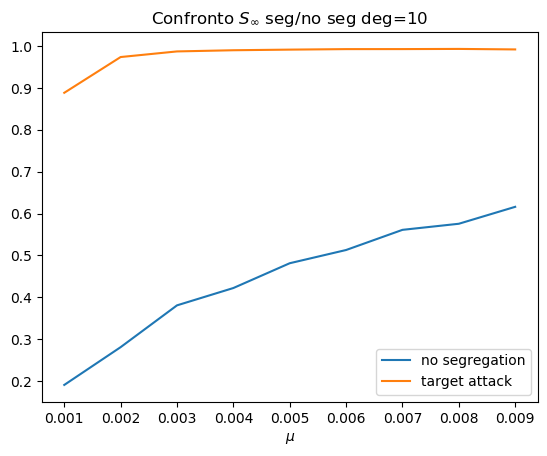

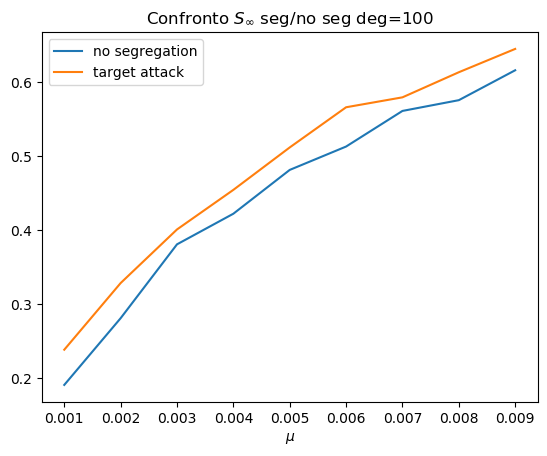

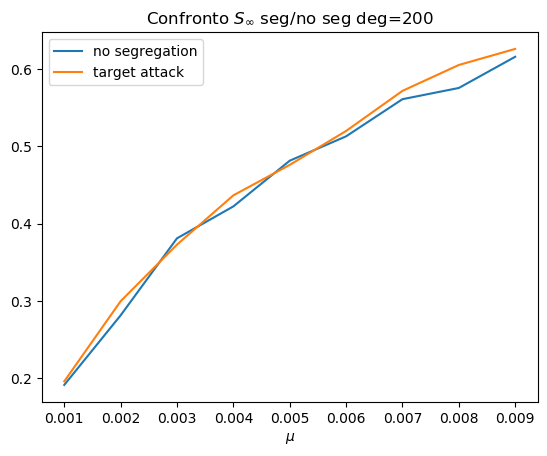

'#%%grafici in funzone di beta per i diversi mu\nprint ("i grafici sono fatti in funzione di beta e per mu = 0.003")\nplt.plot(Y_no_seg_S_inf_b[0],X_no_seg_S_inf_b[0],label="no segregation")\nplt.plot(Y_target_seg_S_inf_b[0][1],X_target_seg_S_inf_b[0][1],label="target attack")\nplt.title("Confronto S_inf seg/no seg deg=10")\nplt.legend()\nplt.show()\n\nplt.plot(Y_no_seg_S_inf_b[0],X_no_seg_S_inf_b[0],label="no segregation")\nplt.plot(Y_target_seg_S_inf_b[2][1],X_target_seg_S_inf_b[2][1],label="target attack")\nplt.title("Confronto S_inf seg/no seg deg=100")\nplt.legend()\nplt.show()\n\nplt.plot(Y_no_seg_S_inf_b[0],X_no_seg_S_inf_b[0],label="no segregation")\nplt.plot(Y_target_seg_S_inf_b[4][1],X_target_seg_S_inf_b[4][1],label="target attack")\nplt.title("Confronto S_inf seg/no seg deg=200")\nplt.legend()\nplt.show()\n\nprint ("i grafici sono fatti in funzione di beta e per mj = 0.008")\nplt.plot(Y_no_seg_S_inf_b[1],X_no_seg_S_inf_b[1],label="no segregation")\nplt.plot(Y_target_seg_S_in

In [11]:
    print ("i grafici sono fatti in funzione di mu e per beta = 0.003")
    plt.plot(S_inf_beta[0][0],S_inf_beta[0][1],label="no segregation")
    plt.plot(Y_target_seg_S_inf_m[0][1],X_target_seg_S_inf_m[0][1],label="target attack")
    plt.title("Confronto $S_\\infty$ seg/no seg deg=10")
    plt.xlabel("$\\mu$")
    plt.legend()
    plt.show()


    plt.plot(S_inf_beta[0][0],S_inf_beta[0][1],label="no segregation")
    plt.plot(Y_target_seg_S_inf_m[2][1],X_target_seg_S_inf_m[2][1],label="target attack")
    plt.title("Confronto $S_\\infty$ seg/no seg deg=100")
    plt.xlabel("$\\mu$")
    plt.legend()
    plt.show()

    plt.plot(S_inf_beta[0][0],S_inf_beta[0][1],label="no segregation")
    plt.plot(Y_target_seg_S_inf_m[4][1],X_target_seg_S_inf_m[4][1],label="target attack")
    plt.title("Confronto $S_\\infty$ seg/no seg deg=200")
    plt.xlabel("$\\mu$")
    plt.legend()
    plt.show()
